In [2]:
!pip install wandb -q

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler ,MinMaxScaler,LabelEncoder,OrdinalEncoder
#from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.base import BaseEstimator
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import itertools
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.2 MB/s eta 0:00:00


In [5]:
!pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo
from category_encoders import TargetEncoder
from function import *

# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

display(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

# variable information
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)


{'uci_id': 296,
 'name': 'Diabetes 130-US Hospitals for Years 1999-2008',
 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008',
 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv',
 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide

                        name     role         type demographic  \
0               encounter_id       ID                     None   
1                patient_nbr       ID                     None   
2                       race  Feature  Categorical        Race   
3                     gender  Feature  Categorical      Gender   
4                        age  Feature  Categorical         Age   
5                     weight  Feature  Categorical        None   
6          admission_type_id  Feature  Categorical        None   
7   discharge_disposition_id  Feature  Categorical        None   
8        admission_source_id  Feature  Categorical        None   
9           time_in_hospital  Feature      Integer        None   
10                payer_code  Feature  Categorical        None   
11         medical_specialty  Feature  Categorical        None   
12        num_lab_procedures  Feature      Integer        None   
13            num_procedures  Feature      Integer        None   
14        

In [7]:
X.sample(5)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
7501,Caucasian,Female,[50-60),NaN,2,5,1,10,NaN,InternalMedicine,...,No,No,No,No,No,No,No,No,No,Yes
86997,Caucasian,Female,[80-90),NaN,2,22,7,8,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes
55478,Caucasian,Male,[80-90),NaN,1,6,1,2,MC,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
25813,Caucasian,Female,[60-70),NaN,1,6,4,8,NaN,Surgery-Cardiovascular/Thoracic,...,No,No,Steady,No,No,No,No,No,Ch,Yes
88859,AfricanAmerican,Female,[60-70),NaN,3,1,1,2,MC,Family/GeneralPractice,...,No,No,Steady,No,No,No,No,No,No,Yes


In [8]:
y

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO
...,...
101761,>30
101762,NO
101763,NO
101764,NO


In [9]:
y=y.replace(['NO','>30','<30'],['0','0','1'])
y=y.astype('int')

In [10]:
y.value_counts()

,count
readmitted,
0,90409
1,11357


In [11]:
display(y.value_counts(normalize=True))

,proportion
readmitted,
0,0.888401
1,0.111599


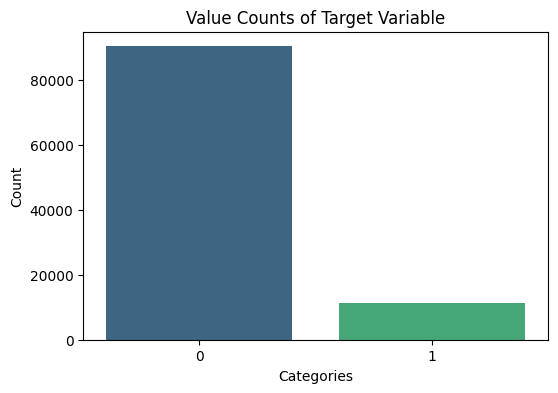

In [12]:
# Convert value counts into a DataFrame for clarity
y_counts = y.value_counts().reset_index()
y_counts.columns = ['Category', 'Count']  # Rename columns

# Plot using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=y_counts['Category'], y=y_counts['Count'], palette="viridis")

# Labels and title
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Value Counts of Target Variable")
plt.show()

#Feature Engeenring


In [13]:
dataframe_info(X)

dataframe shape is : (101766, 47)


,name,dtype,n_unique,n_null
0,race,object,6,2273
1,gender,object,3,0
2,age,object,10,0
3,weight,object,10,98569
4,admission_type_id,int64,8,0
5,discharge_disposition_id,int64,26,0
6,admission_source_id,int64,17,0
7,time_in_hospital,int64,14,0
8,payer_code,object,18,40256
9,medical_specialty,object,73,49949


In [14]:
 # Drop duplicates in place
X.drop_duplicates(keep='first', inplace=True)

In [15]:
X['new_feature'] = X['number_outpatient'] + X['number_emergency'] + X['number_inpatient']

In [16]:

num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.columns[X.dtypes == 'object']

display(num_cols)

print("-----")

display(cat_cols)

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'new_feature'],
      dtype='object')

-----


Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [17]:
print(f"We have {len(num_cols)} numeric columns: {', '.join(num_cols)}")
print(f"And {len(cat_cols)} categorical columns: {', '.join(cat_cols)}")

We have 12 numeric columns: admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, number_diagnoses, new_feature
And 36 categorical columns: race, gender, age, weight, payer_code, medical_specialty, diag_1, diag_2, diag_3, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed


#Numerical Columns

In [18]:
for row in X[num_cols].columns:
  display(print(f'(column name : {row} and unique values is :',X[num_cols][row].unique()))

(column name : admission_type_id and unique values is : [6 1 2 3 4 5 8 7]


None

(column name : discharge_disposition_id and unique values is : [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]


None

(column name : admission_source_id and unique values is : [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]


None

(column name : time_in_hospital and unique values is : [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


None

(column name : num_lab_procedures and unique values is : [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102 100   7  89  91  92   4 101  99 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]


None

(column name : num_procedures and unique values is : [0 5 1 6 2 3 4]


None

(column name : num_medications and unique values is : [ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 27 25  4
 32  6 30 26 24 33  5 39  3 29 61 40 46 41 36 34 35 50 43 42 37 51 38 45
 54 52 49 62 55 47 44 53 48 57 59 56 60 63 58 70 67 64 69 65 68 66 81 79
 75 72 74]


None

(column name : number_outpatient and unique values is : [ 0  2  1  5  7  9  3  8  4 12 11  6 20 15 10 13 14 16 21 35 17 29 36 18
 19 27 22 24 42 39 34 26 33 25 23 28 37 38 40]


None

(column name : number_emergency and unique values is : [ 0  1  2  4  3  9  5  7  6  8 22 25 10 13 42 16 11 28 15 14 18 12 21 20
 19 46 76 37 64 63 54 24 29]


None

(column name : number_inpatient and unique values is : [ 0  1  2  3  6  5  4  7  8  9 15 10 11 14 12 13 17 16 21 18 19]


None

(column name : number_diagnoses and unique values is : [ 1  9  6  7  5  8  3  4  2 16 12 13 15 10 11 14]


None

(column name : new_feature and unique values is : [ 0  3  1  2  6  7 10  5  4 14 15  8 12  9 13 11 18 17 25 27 23 30 16 31
 19 20 21 22 35 49 34 38 28 26 24 32 42 40 36 33 29 37 48 80 68 61 41]


None

In [19]:
df_numerical=X[num_cols].copy()
df_numerical.describe().style.background_gradient()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,new_feature
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,1.202759
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,2.291781
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,2.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,80.000000


multicollinearity -check


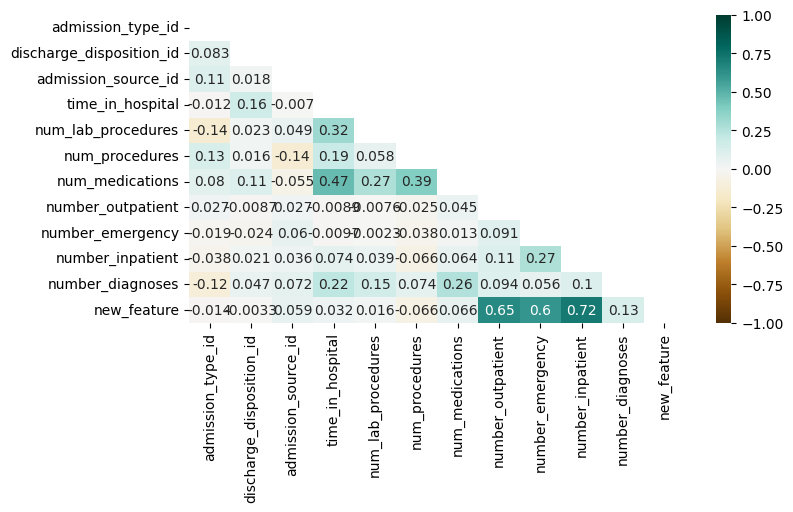

In [20]:

corr_matrix = df_numerical.corr(method='pearson') #method='pearson'for linearity ,we can use also Spearman's Rank Correlation Coefficient
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(8,4))
# Plot heatmap
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Show the plot
plt.show()

In [21]:
df_numerical['target']=y

check correlation between target values and features

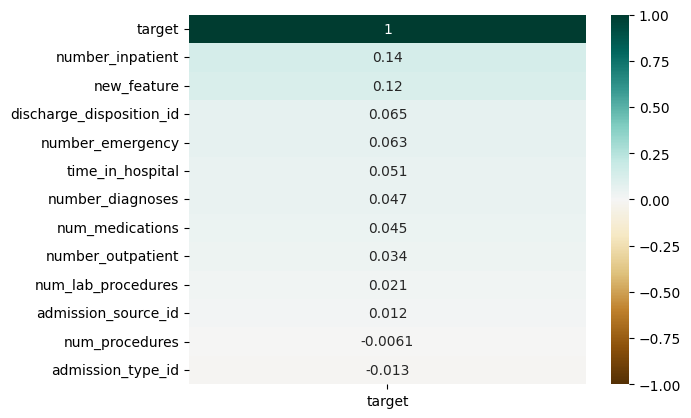

In [22]:
heatmap = sns.heatmap(df_numerical.corr(method='spearman')[['target']].sort_values(by='target',
                                                                                          ascending=False),
                                                                                           vmin=-1, vmax=1, annot=True, cmap='BrBG')


<Axes: >

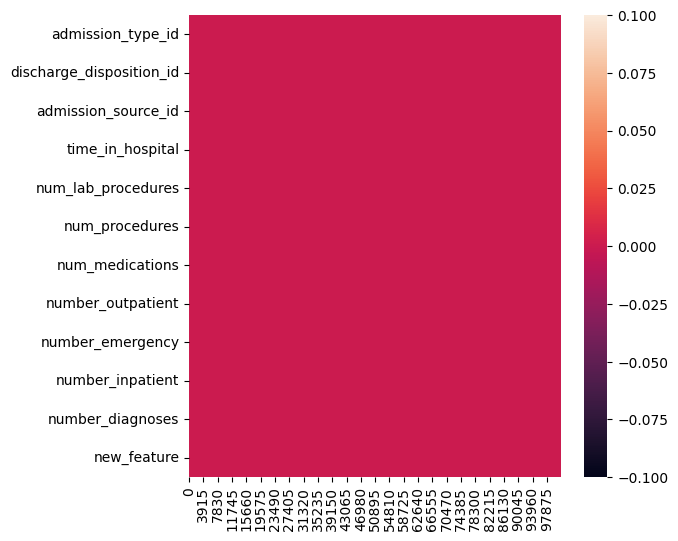

In [23]:
#nan_values oh numerical cols
plt.figure(figsize=(6,6))
sns.heatmap(X[num_cols].isna().transpose())

In [24]:
display(X.shape)

(101766, 48)

drop columns

In [25]:
X.drop(columns=['admission_source_id',
                'discharge_disposition_id',
                'admission_type_id',
                'number_outpatient','number_emergency','number_inpatient'
                ],
        inplace=True)


In [26]:
cols_to_remove = ['admission_source_id', 'discharge_disposition_id', 'admission_type_id',
                   'number_outpatient','number_emergency','number_inpatient'
                ]
num_cols = [col for col in num_cols if col not in cols_to_remove]


In [27]:
display(X.shape)
display(len(num_cols))

(101766, 42)

6

#Categorical **columns**

In [28]:
for row in X[cat_cols].columns:
  display(print(f'(column name : {row} and unique values is :',X[cat_cols][row].unique()))

(column name : race and unique values is : ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']


None

(column name : gender and unique values is : ['Female' 'Male' 'Unknown/Invalid']


None

(column name : age and unique values is : ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


None

(column name : weight and unique values is : [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


None

(column name : payer_code and unique values is : [nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']


None

(column name : medical_specialty and unique values is : ['Pediatrics-Endocrinology' nan 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'InfectiousDiseases' 'Anesthesiology'
 'Rheumatology' 'AllergyandImmunology'

None

(column name : diag_1 and unique values is : ['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157'
 '518' '999' '410' '682' '402' '737' '572' 'V57' '189' '786' '427' '996'
 '277' '584' '462' '473' '411' '174' '486' '998' '511' '432' '626' '295'
 '196' '250.6' '618' '182' '845' '423' '808' '250.4' '722' '403' '250.11'
 '784' '707' '440' '151' '715' '997' '198' '564' '812' '38' '590' '556'
 '578' '250.32' '433' 'V58' '569' '185' '536' '255' '250.13' '599' '558'
 '574' '491' '560' '244' '250.03' '577' '730' '188' '824' '250.8' '332'
 '562' '291' '296' '510' '401' '263' '438' '70' '250.02' '493' '642' '625'
 '571' '738' '593' '250.42' '807' '456' '446' '575' '250.41' '820' '515'
 '780' '250.22' '995' '235' '250.82' '721' '787' '162' '724' '282' '514'
 'V55' '281' '250.33' '530' '466' '435' '250.12' 'V53' '789' '566' '822'
 '191' '557' '733' '455' '711' '482' '202' '280' '553' '225' '154' '441'
 '250.81' '349' nan '962' '592' '507' '386' '156' '200' '728' '348' '459'
 '426' 

None

(column name : diag_2 and unique values is : [nan '250.01' '250' '250.43' '157' '411' '492' '427' '198' '403' '288'
 '998' '507' '174' '425' '456' '401' '715' '496' '428' '585' '250.02'
 '410' '999' '996' '135' '244' '41' '571' '276' '997' '599' '424' '491'
 '553' '707' '286' '440' '493' '242' '70' 'V45' '250.03' '357' '511' '196'
 '396' '197' '414' '250.52' '577' '535' '413' '285' '53' '780' '518' '150'
 '566' '250.6' '867' '486' 'V15' '8' '788' '340' '574' '581' '228' '530'
 '250.82' '786' '294' '567' '785' '512' '305' '729' '250.51' '280' '648'
 '560' '618' '444' '38' 'V10' '578' '277' '781' '250.42' '278' '426' '584'
 '462' '402' '153' '272' '733' '34' '881' '203' '250.41' '250.13' '293'
 '245' '250.12' '558' '787' '342' '573' '626' '303' '250.53' '458' '710'
 '415' 'V42' '284' '569' '759' '682' '112' '292' '435' '290' '250.93'
 '642' '536' '398' '319' '711' 'E878' '446' '255' 'V44' '250.7' '784'
 '300' '562' '162' '287' '447' '789' '790' '591' '200' '154' '304' '117'
 '847' '852' 

None

(column name : diag_3 and unique values is : [nan '255' 'V27' '403' '250' 'V45' '38' '486' '996' '197' '250.6' '427'
 '627' '414' '416' '714' '428' '582' 'V43' '250.01' '263' '250.42' '276'
 '482' '401' '250.41' '585' '781' '278' '998' '568' '682' '618' '250.02'
 '305' '707' '496' '599' '715' '424' '518' '553' '794' '411' 'V42' '531'
 '511' '490' '562' '250.8' '250.7' '250.52' '784' '491' '581' '420' '8'
 '724' '730' '789' '131' '250.82' '999' '41' '493' '250.03' '753' '786'
 '529' 'E888' '425' '595' '303' '560' '711' '492' '332' '296' '438' '362'
 '250.4' '654' '244' 'V70' '737' '625' '681' '250.51' '404' 'V10' '810'
 '280' '440' '785' '588' '569' '272' '997' '250.43' '918' '584' '54' '788'
 '426' '722' '250.92' '196' '461' '535' '787' '891' '284' '458' '648'
 '780' '182' '285' '593' '413' '664' '564' '201' '356' 'V15' '292' '782'
 '473' '455' 'E932' '357' '348' '294' '250.23' '459' 'E878' '437' '733'
 '507' '525' '250.53' '397' '572' '805' '453' '331' '736' '402' '591'
 '576' '465' '

None

(column name : max_glu_serum and unique values is : [nan '>300' 'Norm' '>200']


None

(column name : A1Cresult and unique values is : [nan '>7' '>8' 'Norm']


None

(column name : metformin and unique values is : ['No' 'Steady' 'Up' 'Down']


None

(column name : repaglinide and unique values is : ['No' 'Up' 'Steady' 'Down']


None

(column name : nateglinide and unique values is : ['No' 'Steady' 'Down' 'Up']


None

(column name : chlorpropamide and unique values is : ['No' 'Steady' 'Down' 'Up']


None

(column name : glimepiride and unique values is : ['No' 'Steady' 'Down' 'Up']


None

(column name : acetohexamide and unique values is : ['No' 'Steady']


None

(column name : glipizide and unique values is : ['No' 'Steady' 'Up' 'Down']


None

(column name : glyburide and unique values is : ['No' 'Steady' 'Up' 'Down']


None

(column name : tolbutamide and unique values is : ['No' 'Steady']


None

(column name : pioglitazone and unique values is : ['No' 'Steady' 'Up' 'Down']


None

(column name : rosiglitazone and unique values is : ['No' 'Steady' 'Up' 'Down']


None

(column name : acarbose and unique values is : ['No' 'Steady' 'Up' 'Down']


None

(column name : miglitol and unique values is : ['No' 'Steady' 'Down' 'Up']


None

(column name : troglitazone and unique values is : ['No' 'Steady']


None

(column name : tolazamide and unique values is : ['No' 'Steady' 'Up']


None

(column name : examide and unique values is : ['No']


None

(column name : citoglipton and unique values is : ['No']


None

(column name : insulin and unique values is : ['No' 'Up' 'Steady' 'Down']


None

(column name : glyburide-metformin and unique values is : ['No' 'Steady' 'Down' 'Up']


None

(column name : glipizide-metformin and unique values is : ['No' 'Steady']


None

(column name : glimepiride-pioglitazone and unique values is : ['No' 'Steady']


None

(column name : metformin-rosiglitazone and unique values is : ['No' 'Steady']


None

(column name : metformin-pioglitazone and unique values is : ['No' 'Steady']


None

(column name : change and unique values is : ['No' 'Ch']


None

(column name : diabetesMed and unique values is : ['No' 'Yes']


None

#nan values handle

<Axes: >

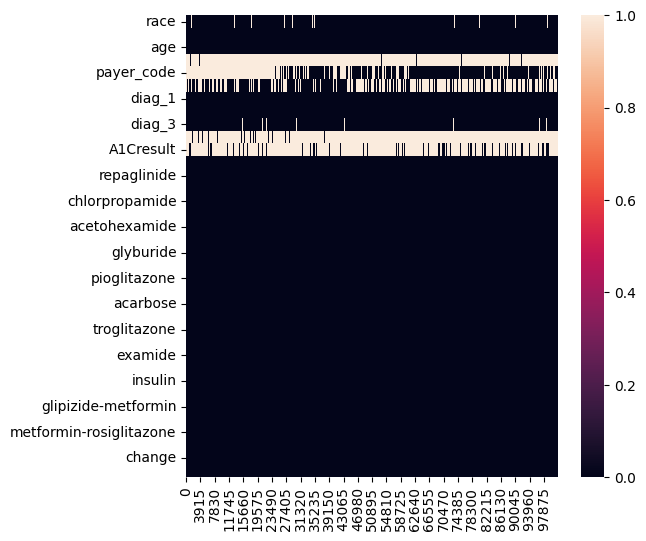

In [29]:

#nan_values oh categorical cols
plt.figure(figsize=(6,6))
sns.heatmap(X[cat_cols].isna().transpose())

drop thershold -0.8 nan values

In [30]:
threshold = 0.8  # 80% threshold
missing_ratio = X[cat_cols].isnull().mean()  # Calculate missing value percentage
cols_to_drop = missing_ratio[missing_ratio > threshold].index  # Select columns exceeding threshold
display(cols_to_drop)



Index(['weight', 'max_glu_serum', 'A1Cresult'], dtype='object')

In [31]:
X.drop(columns=cols_to_drop,
        inplace=True)

In [32]:
cat_cols = [col for col in cat_cols if col not in cols_to_drop]

In [33]:
display(X.shape)
display(len(cat_cols))

(101766, 39)

33

In [34]:
age_id = {'[0-10)':5,
          '[10-20)':15,
          '[20-30)':25,
          '[30-40)':35,
          '[40-50)':45,
          '[50-60)':55,
          '[60-70)':65,
          '[70-80)':75,
          '[80-90)':85,
          '[90-100)':95}
X['age'] = X.age.replace(age_id).astype('int')

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  int64 
 3   time_in_hospital          101766 non-null  int64 
 4   payer_code                61510 non-null   object
 5   medical_specialty         51817 non-null   object
 6   num_lab_procedures        101766 non-null  int64 
 7   num_procedures            101766 non-null  int64 
 8   num_medications           101766 non-null  int64 
 9   diag_1                    101745 non-null  object
 10  diag_2                    101408 non-null  object
 11  diag_3                    100343 non-null  object
 12  number_diagnoses          101766 non-null  int64 
 13  metformin                 101766 non-null  object
 14  repa

In [36]:
# Get the top 10 most common values
#top_10_values =X['medical_specialty'].value_counts().nlargest(10).index
#X.loc[~df.medical_specialty.isin(top_10),'medical_specialty']= 'Other'

In [37]:
# Get the top 10 most common values
top_10_values =X['medical_specialty'].value_counts().nlargest(10).index
# Replace all other values with "Other"
X['medical_specialty'] = X['medical_specialty'].apply(lambda x: x if x in top_10_values else 'Other')
# Check the updated value counts
print(X['medical_specialty'].value_counts())

# Get the top 10 most common values
top_10_values =X['diag_1'].value_counts().nlargest(10).index
# Replace all other values with "Other"
X['diag_1'] = X['diag_1'].apply(lambda x: x if x in top_10_values else 'Other')
# Check the updated value counts
print(X['diag_1'].value_counts())


# Get the top 10 most common values
top_10_values =X['diag_2'].value_counts().nlargest(10).index
# Replace all other values with "Other"
X['diag_2'] = X['diag_2'].apply(lambda x: x if x in top_10_values else 'Other')
# Check the updated value counts
print(X['diag_2'].value_counts())

# Get the top 10 most common values
top_10_values =X['diag_3'].value_counts().nlargest(10).index
# Replace all other values with "Other"
X['diag_3'] = X['diag_3'].apply(lambda x: x if x in top_10_values else 'Other')
# Check the updated value counts
print(X['diag_3'].value_counts())

medical_specialty
Other                         57418
InternalMedicine              14635
Emergency/Trauma               7565
Family/GeneralPractice         7440
Cardiology                     5352
Surgery-General                3099
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Radiologist                    1140
Pulmonology                     871
Name: count, dtype: int64
diag_1
Other    65923
428       6862
414       6581
786       4016
410       3614
486       3508
427       2766
491       2275
715       2151
682       2042
434       2028
Name: count, dtype: int64
diag_2
Other    58877
276       6752
428       6662
250       6071
427       5036
401       3736
496       3305
599       3288
403       2823
414       2650
411       2566
Name: count, dtype: int64
diag_3
Other    55628
250      11555
401       8289
276       5175
428       4577
427       3955
414       3664
496       2605
403       2357
585       1992
272    

In [38]:
cols=["examide" ,"citoglipton"]

X.drop(columns=cols,
        inplace=True)

In [39]:
cat_cols = [col for col in cat_cols if col not in cols]
display(X.shape)

(101766, 37)

In [40]:
display(len(cat_cols))

31

#visualization

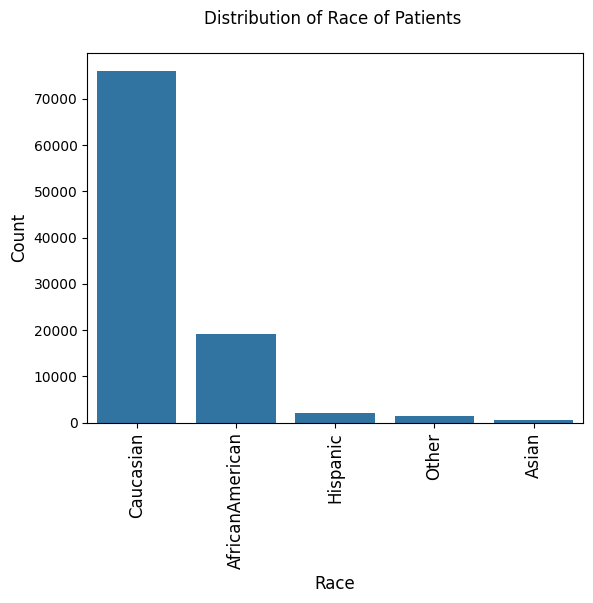

In [41]:
ax = sns.barplot(x=X['race'].value_counts().index,
                 y=X['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

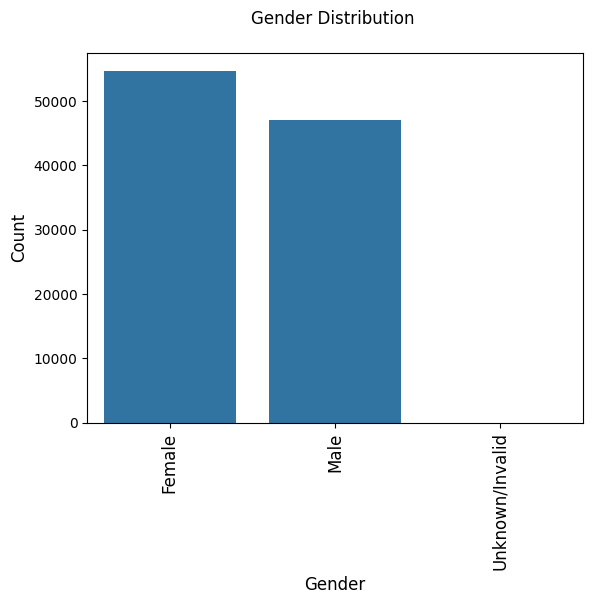

In [42]:
ax = sns.countplot(x='gender',   data= X)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender Distribution \n', size = 12)
plt.show()

drop index

In [43]:
X[X['gender'] == 'Unknown/Invalid']

,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,diag_1,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,new_feature
30506,Other,Unknown/Invalid,75,1,NaN,Cardiology,5,5,22,414,...,No,No,No,No,No,No,No,Ch,Yes,0
75551,NaN,Unknown/Invalid,65,1,CP,Other,38,1,6,Other,...,No,No,No,No,No,No,No,No,No,0
82573,NaN,Unknown/Invalid,75,8,CP,Other,59,2,21,Other,...,No,No,No,No,No,No,No,Ch,Yes,0


In [44]:
# Drop specific indices from DataFrame Y
y.drop([30506, 75551, 82573], inplace=True)


In [45]:
# Drop the "Unknown/Invalid" gender of the data.
X.drop(X[X['gender'] == 'Unknown/Invalid'].index, inplace = True)

In [46]:
# Drop the same rows from Y using the same index
#y.drop(y.index[X['gender'] == 'Unknown/Invalid'], inplace=True)


In [47]:
X.reset_index(inplace = True, drop = True)

In [48]:
# Adjusting rcParams for global figure properties
plt.rcParams['figure.figsize'] = (8, 6)

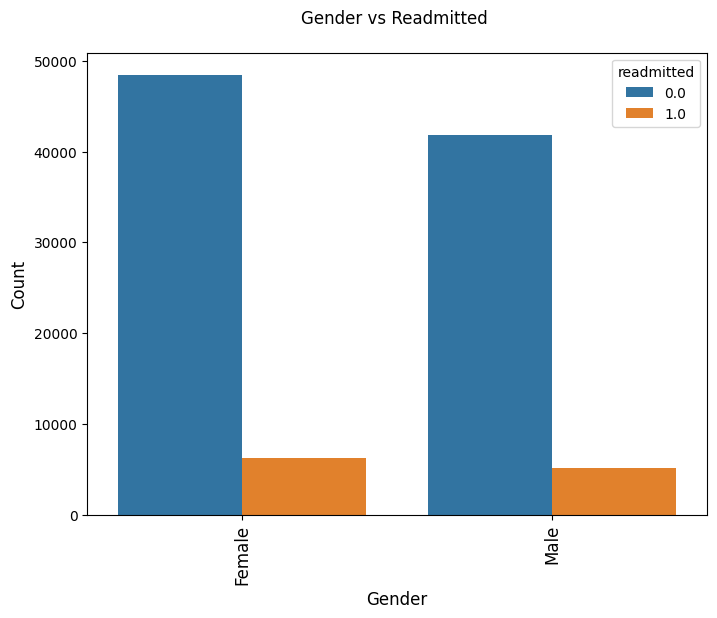

In [49]:
# Concatenate along columns (axis=1)
df = pd.concat([X, y], axis=1)
ax = sns.countplot(x="gender", hue="readmitted", data=df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender vs Readmitted \n', size = 12)
plt.show()

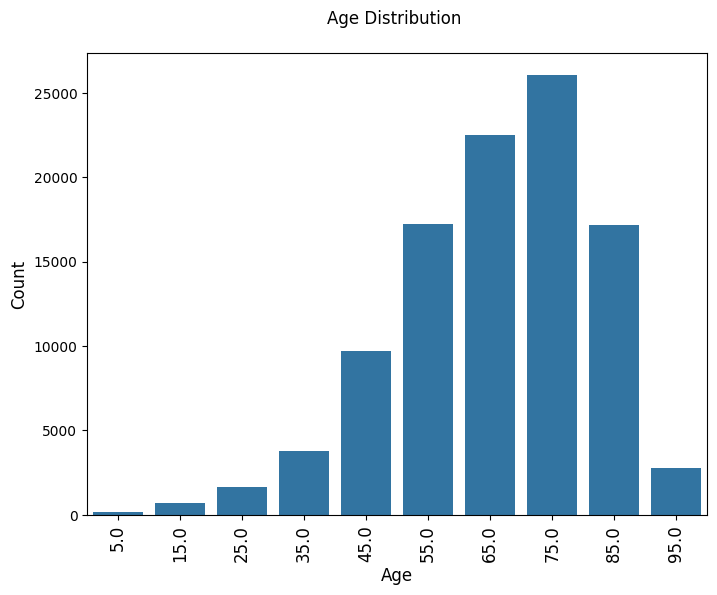

In [50]:
ax = sns.countplot(x='age',   data= df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age Distribution \n', size = 12)
plt.show()

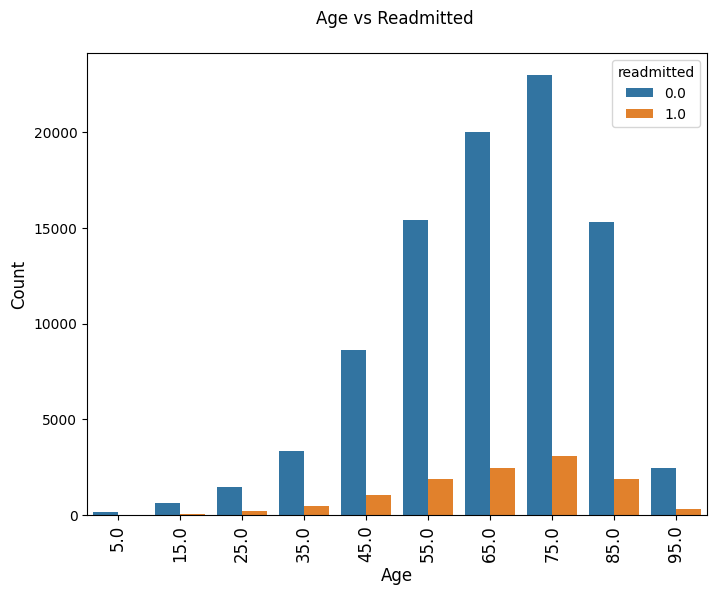

In [51]:
ax = sns.countplot(x="age", hue="readmitted", data=df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age vs Readmitted \n', size = 12)
plt.show()


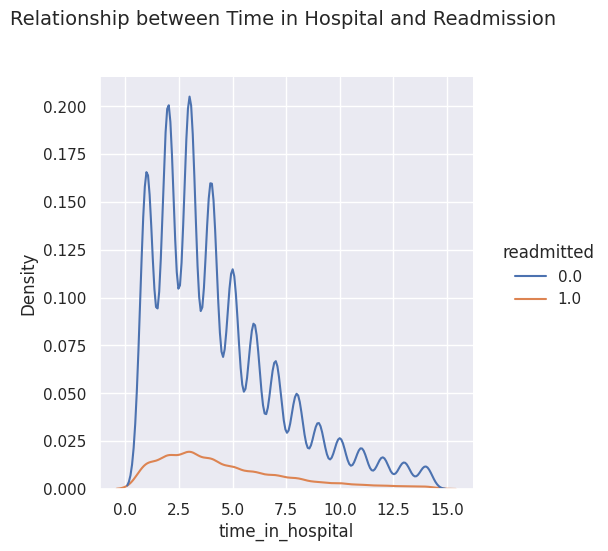

In [52]:
sns.set(rc={'figure.figsize':(18, 8.2)})
sns.displot(df, x="time_in_hospital", hue = 'readmitted', kind="kde")
plt.title('Relationship between Time in Hospital and Readmission \n\n', size  = 14)
plt.show()

#Training

For business tasks in classification problems, it is always necessary to select an appropriate probability threshold. By default, scikit-learn uses a threshold of 0.5, but selecting the right threshold is crucial for optimal decision-making. Additionally, we can train different models and fine-tune various parameters to improve performance and achieve better results.

In [53]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

for i in cat_cols:
    X[i] = le.fit_transform(X[i]).astype("int")

In [54]:

num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.columns[X.dtypes == 'object']

display(num_cols)

print("-----")

display(cat_cols)

Index(['race', 'gender', 'age', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'new_feature'],
      dtype='object')

-----


Index([], dtype='object')

In [55]:
print(f"We have {len(num_cols)} numeric columns: {', '.join(num_cols)}")
print(f"And {len(cat_cols)} categorical columns: {', '.join(cat_cols)}")

We have 37 numeric columns: race, gender, age, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, diag_1, diag_2, diag_3, number_diagnoses, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, new_feature
And 0 categorical columns: 


In [56]:
X_train,X_val,y_train,y_val= split(X,y)

Training Features Shape: (81410, 37)
Training Labels Shape: (81410, 1)
Testing Features Shape: (20353, 37)
Testing Labels Shape: (20353, 1)


In [57]:
numerical_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors=1)),
    ('poly', PolynomialFeatures(degree=1)), #include_bias=False
    ('scaler', MinMaxScaler())
])


preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_cols),  #
])

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

#X_train = preprocessors.fit_transform(X_train, y_train) #for target_encoding
X_train = preprocessors.fit_transform(X_train)
X_test = preprocessors.transform(X_val)


In [61]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import ReLU, LeakyReLU, PReLU



In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Veri setini böl
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# SMOTE uygula
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [65]:
def prepare_datasets(X_train, X_val, y_train, y_val, batch_size=None):
    if batch_size is None:
        batch_size = len(X_train)
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    val_dataset = val_dataset.batch(batch_size)
    return train_dataset, val_dataset

In [66]:
train_ds, val_ds = prepare_datasets(X_train_resampled,
                                    X_val,
                                    y_train_resampled,
                                    y_val, batch_size=32)


In [67]:
base_model = Sequential([

    Input(shape=(train_ds.element_spec[0].shape[1],)),
    Dense(50, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')])

optimizer = Adam(learning_rate=0.001)

base_model.compile(optimizer=optimizer,
                   loss="binary_crossentropy",
                   metrics=["accuracy", "precision", "recall", "auc"])

call_backs = EarlyStopping(monitor='val_auc',
                               patience=20,
                               verbose=1,
                               restore_best_weights=True,
                               mode="max")

base_model_history = base_model.fit(train_ds,
                                    epochs=500,
                                    validation_data=val_ds,
                                    verbose=1,
                                    callbacks=call_backs)

Epoch 1/500
3958/3958 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.6282 - auc: 0.6725 - loss: 0.6878 - precision: 0.6282 - recall: 0.6316 - val_accuracy: 0.5016 - val_auc: 0.5514 - val_loss: 0.8452 - val_precision: 0.1259 - val_recall: 0.5757
Epoch 2/500
3958/3958 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7201 - auc: 0.7827 - loss: 0.5803 - precision: 0.7193 - recall: 0.7257 - val_accuracy: 0.6328 - val_auc: 0.5408 - val_loss: 0.6700 - val_precision: 0.1276 - val_recall: 0.3868
Epoch 3/500
3958/3958 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7199 - auc: 0.7860 - loss: 0.5740 - precision: 0.7174 - recall: 0.7240 - val_accuracy: 0.7684 - val_auc: 0.5379 - val_loss: 0.5224 - val_precision: 0.1395 - val_recall: 0.2040
Epoch 4/500
3958/3958 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7221 - auc: 0.7861 - loss: 0.5731 - precision: 0.7195 - recall: 0.7291 - val_accuracy: 0.5895 - val_auc: 0.5339 - val_loss: 0.7184 - val_precision: 0.1226 - val_recall: 0.4292
Epoch 5/500
3958

In [68]:
def get_best_epoch_details(history, metric="val_loss", mode=min):
    metric_values = history.history[metric]
    min_metric_value_index = metric_values.index(mode(metric_values))
    best_epoch = min_metric_value_index + 1

    metrics = []
    values = []

    for key, value in history.history.items():
        metrics.append(key)
        values.append(value[min_metric_value_index])

    data = {'Metric': metrics, 'Value': values}
    df = pd.DataFrame(data)
    df['Value'] = df['Value'].map('{:.4f}'.format)
    best_epoch_data = pd.DataFrame({'Metric': ['best_epoch'], 'Value': [str(best_epoch)]})
    df = pd.concat([df, best_epoch_data], ignore_index=True)
    return df

get_best_epoch_details(base_model_history, metric="val_auc", mode=max)

,Metric,Value
0,accuracy,0.6790
1,auc,0.7397
2,loss,0.6270
3,precision,0.6782
4,recall,0.6813
5,val_accuracy,0.5016
6,val_auc,0.5514
7,val_loss,0.8452
8,val_precision,0.1259
9,val_recall,0.5757


In [69]:
val_loss, val_accuracy, val_precision, val_recall, val_auc = base_model.evaluate(val_ds, verbose=0)
f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation AUC: {val_auc}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")
print(f"Validation F1-Score: {f1_score}")

Validation Loss: 0.8451578617095947
Validation Accuracy: 0.5015559196472168
Validation AUC: 0.5514279007911682
Validation Precision: 0.12587368488311768
Validation Recall: 0.5757047533988953
Validation F1-Score: 0.20658011923084893


955/955 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


<Figure size 1800x820 with 0 Axes>

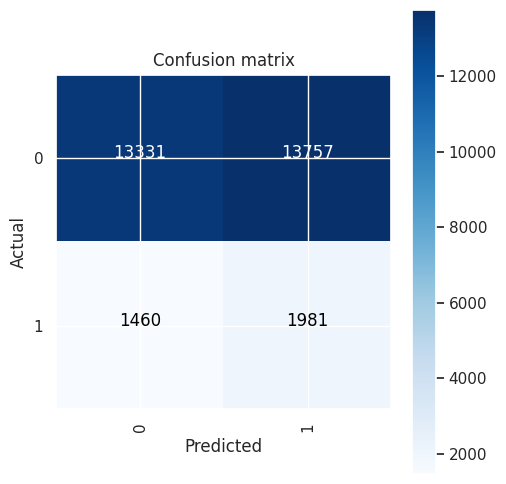

Precision =     0.126
Recall    =     0.576
F1_score  =     0.207


In [74]:
# Step 7: Make predictions
y_pred = base_model.predict(X_val)
# Convert probabilities to binary predictions (default threshold 0.5)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred_binary)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names, )
plt.savefig('2.xgb_cfl_confusion_matrix.png')
plt.show()

show_metrics(cm)